# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import numpy as np

In [4]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [18]:
data.describe()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
count,128355.000000,128355.000000,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037,7.188161,22.624213
std,0.404454,3.645826,28.924944,30.640156,239.693277
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.330000,0.000000,1.000000
75%,2017.000000,10.000000,3.250000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [5]:
data_subset = data[["ItemType","RetailSales","RetailTransfers","WarehouseSales"]]



In [6]:
data_melted = data_subset.melt(id_vars="ItemType", var_name="SaleType", value_name="Quantity")
data_melted.head(2)

,ItemType,SaleType,Quantity
0,WINE,RetailSales,0.0
1,WINE,RetailSales,0.0


In [16]:
data_melted.describe()

,Quantity
count,385065.000000
mean,12.125137
std,140.704860
min,-4996.000000
25%,0.000000
50%,0.410000
75%,4.000000
max,16271.750000


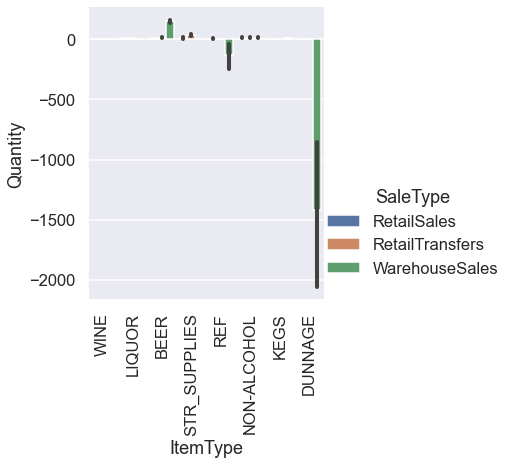

In [28]:
sns.set(context='talk', style='darkgrid', rc={'figure.figsize': (1000,1000)})
retail_bars = sns.catplot(data=data_melted, x='ItemType',  y='Quantity', hue='SaleType', kind='bar')
retail_bars.set_xticklabels(rotation=90);

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [7]:
data_suppliers = data.groupby(data.Supplier).agg({"RetailSales": 'sum',"RetailTransfers": 'sum',"WarehouseSales": 'sum'})
data_suppliers["Total Sales"]=data_suppliers["RetailSales"]+data_suppliers["RetailTransfers"]+data_suppliers["WarehouseSales"]
data_suppliers = data_suppliers.sort_values("Total Sales", ascending=False)
data_suppliers = data_suppliers.head(10)
data_suppliers = data_suppliers.reset_index()
data_suppliers

,Supplier,RetailSales,RetailTransfers,WarehouseSales,Total Sales
0,MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
1,CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
2,ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
3,HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
4,E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
5,DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
6,CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
7,JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
8,THE WINE GROUP,25758.15,28462.05,26603.78,80823.98
9,BOSTON BEER CORPORATION,10773.25,11869.96,53420.91,76064.12


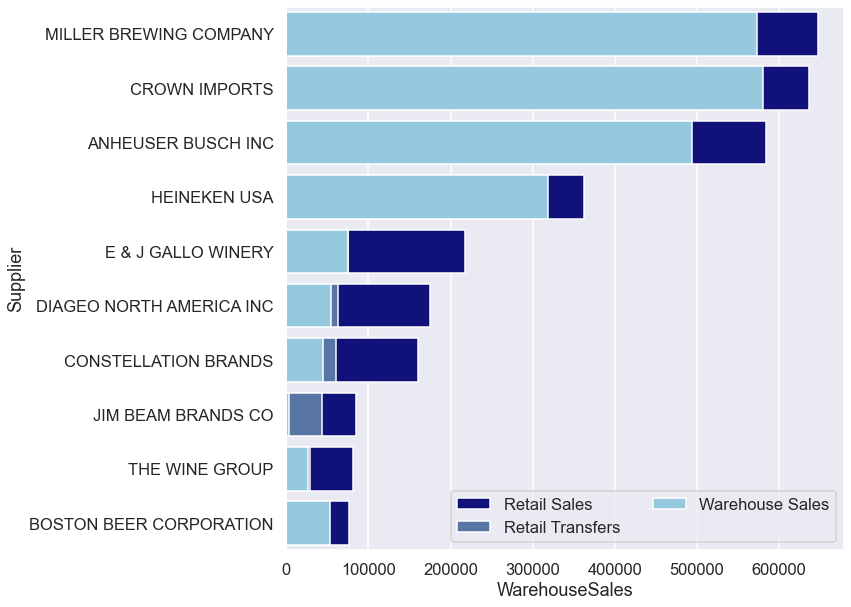

In [67]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(context='talk', style='darkgrid', rc={'figure.figsize': (10,10)})
sns.barplot(x="Total Sales", y="Supplier", data=data_suppliers, color="darkblue",label="Retail Sales")
sns.barplot(x="RetailTransfers", y="Supplier", data=data_suppliers, color="b",label="Retail Transfers")
sns.barplot(x="WarehouseSales", y="Supplier", data=data_suppliers, color="skyblue",label="Warehouse Sales")
ax.legend(ncol=2, loc="lower right", frameon=True)


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [8]:
data_date = data.copy()

In [9]:
data_date["Fecha"]= data_date['Year'].map(str) + "-" + data_date['Month'].map(str)

In [10]:
data_date.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,Fecha
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,2017-4
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,2017-4
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,2017-4
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2017-4
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,2017-4


In [11]:
data_date_2 = data_date.groupby("Fecha").agg({"RetailSales": "sum","RetailTransfers": "sum","WarehouseSales": "sum"})
data_date_2 = data_date_2.reset_index()

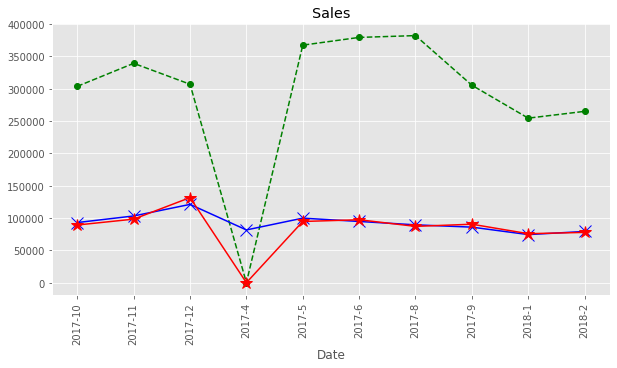

In [12]:
x = data_date_2['Fecha']
y = data_date_2['WarehouseSales']
z = data_date_2['RetailTransfers']
w = data_date_2['RetailSales']

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='.', linestyle='dashed', markersize=12, color = 'green')
plt.plot(x, z, marker='x', linestyle='solid', markersize=12, color = 'blue')
plt.plot(x, w, marker='*', linestyle='solid', markersize=12, color = 'red')
plt.xticks(rotation='vertical')
plt.title('Sales')
plt.xlabel('Date')
plt.show()

## 4. Plot the same information as above but as a bar chart.

In [12]:
data_date_2["Total Sales"]=data_date_2["RetailSales"]+data_date_2["RetailTransfers"]+data_date_2["WarehouseSales"]

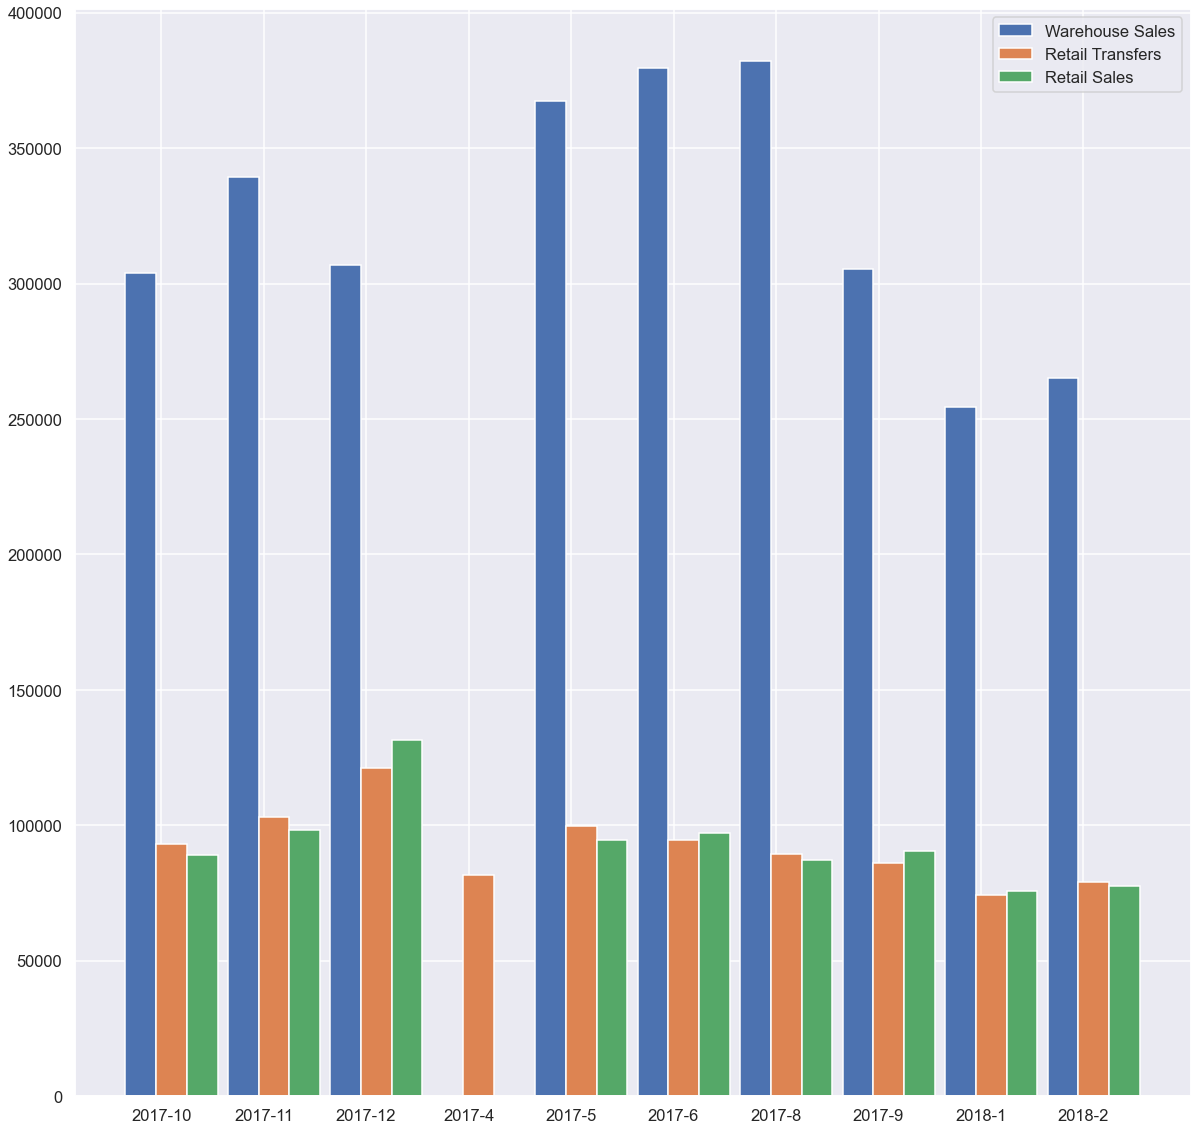

In [47]:
# f, ax = plt.subplots(figsize=(10, 10))
# sns.set(context='talk', style='darkgrid', rc={'figure.figsize': (20,20)})
# sns.barplot(y="Total Sales", x="Fecha", data=data_date_2, color="darkblue",label="Retail Sales")
# sns.barplot(y="RetailTransfers", x="Fecha", data=data_date_2, color="b",label="Retail Transfers")
# sns.barplot(y="WarehouseSales", x="Fecha", data=data_date_2, color="skyblue",label="Warehouse Sales")
# ax.legend(ncol=1, loc="upper right", frameon=True)

X = data_date_2["Fecha"]
X_axis = np.arange(len(data_date_2["Fecha"]))

plt.bar(X_axis - 0.2, data_date_2["WarehouseSales"], 0.3, label = 'Warehouse Sales')
plt.bar(X_axis + 0.1, data_date_2["RetailTransfers"], 0.3, label = 'Retail Transfers')
plt.bar(X_axis + 0.4, data_date_2["RetailSales"], 0.3, label = 'Retail Sales')
  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
plt.legend()
plt.show()


## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [57]:
data_date.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,Fecha
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,2017-4
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,2017-4
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,2017-4
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2017-4
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,2017-4


In [57]:
data_item = data_date.groupby(["ItemType","Fecha"]).agg({"RetailSales": "sum", "RetailTransfers": "sum"})
data_item = data_item.reset_index()

In [61]:
data_item.head()

,ItemType,Fecha,RetailSales,RetailTransfers
0,BEER,2017-10,22583.78,22478.76
1,BEER,2017-11,23341.14,25858.78
2,BEER,2017-12,28822.16,24978.53
3,BEER,2017-4,0.00,20045.00
4,BEER,2017-5,25023.24,27133.83


In [15]:
data_item["ItemType"].unique()

array(['BEER', 'DUNNAGE', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF',
       'STR_SUPPLIES', 'WINE'], dtype=object)

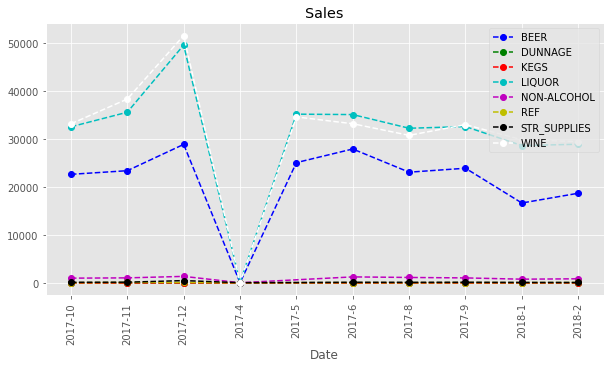

In [19]:
colors = ["b", "g", "r", "c", "m", "y", "k", "w"]

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))

for item, color in zip(data_item["ItemType"].unique(), colors):
    plt.plot(data_item[data_item["ItemType"]==item]["Fecha"], data_item[data_item["ItemType"]==item]["RetailSales"], marker='.', linestyle='dashed', markersize=12, color = color, label=item)

plt.xticks(rotation='vertical')
plt.title('Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

## 6. Plot the same information as above but as a bar chart.

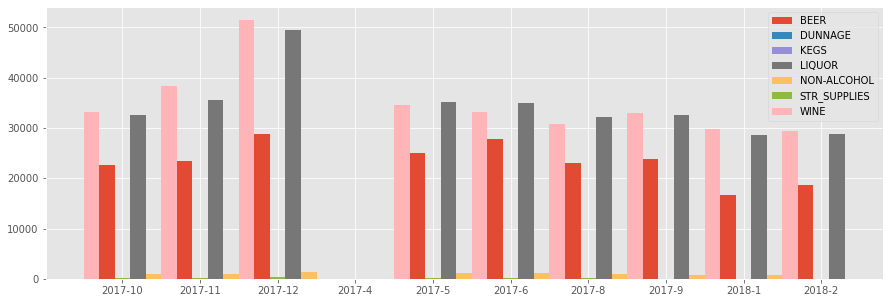

In [51]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
X_axis = np.arange(len(data_item[data_item["ItemType"]=='BEER']["Fecha"]))
X = data_item[data_item["ItemType"]=='BEER']["Fecha"]

plt.bar(X_axis - 0.2, data_item[data_item["ItemType"]=='BEER']["RetailSales"], 0.2, label = 'BEER')
X_axis = np.arange(len(data_item[data_item["ItemType"]=='DUNNAGE']["Fecha"]))
plt.bar(X_axis + 0.0, data_item[data_item["ItemType"]=='DUNNAGE']["RetailSales"], 0.2, label = 'DUNNAGE')
X_axis = np.arange(len(data_item[data_item["ItemType"]=='KEGS']["Fecha"]))
plt.bar(X_axis + 0.0, data_item[data_item["ItemType"]=='KEGS']["RetailSales"], 0.2, label = 'KEGS')
X_axis = np.arange(len(data_item[data_item["ItemType"]=='LIQUOR']["Fecha"]))
plt.bar(X_axis + 0.2, data_item[data_item["ItemType"]=='LIQUOR']["RetailSales"], 0.2, label = 'LIQUOR')
X_axis = np.arange(len(data_item[data_item["ItemType"]=='NON-ALCOHOL']["Fecha"]))
plt.bar(X_axis + 0.4, data_item[data_item["ItemType"]=='NON-ALCOHOL']["RetailSales"], 0.2, label = 'NON-ALCOHOL')
X_axis = np.arange(len(data_item[data_item["ItemType"]=='STR_SUPPLIES']["Fecha"]))
plt.bar(X_axis, data_item[data_item["ItemType"]=='STR_SUPPLIES']["RetailSales"], 0.2, label = 'STR_SUPPLIES')
X_axis = np.arange(len(data_item[data_item["ItemType"]=='WINE']["Fecha"]))
plt.bar(X_axis - 0.4, data_item[data_item["ItemType"]=='WINE']["RetailSales"], 0.2, label = 'WINE')


plt.xticks(X_axis, X)
plt.legend()
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

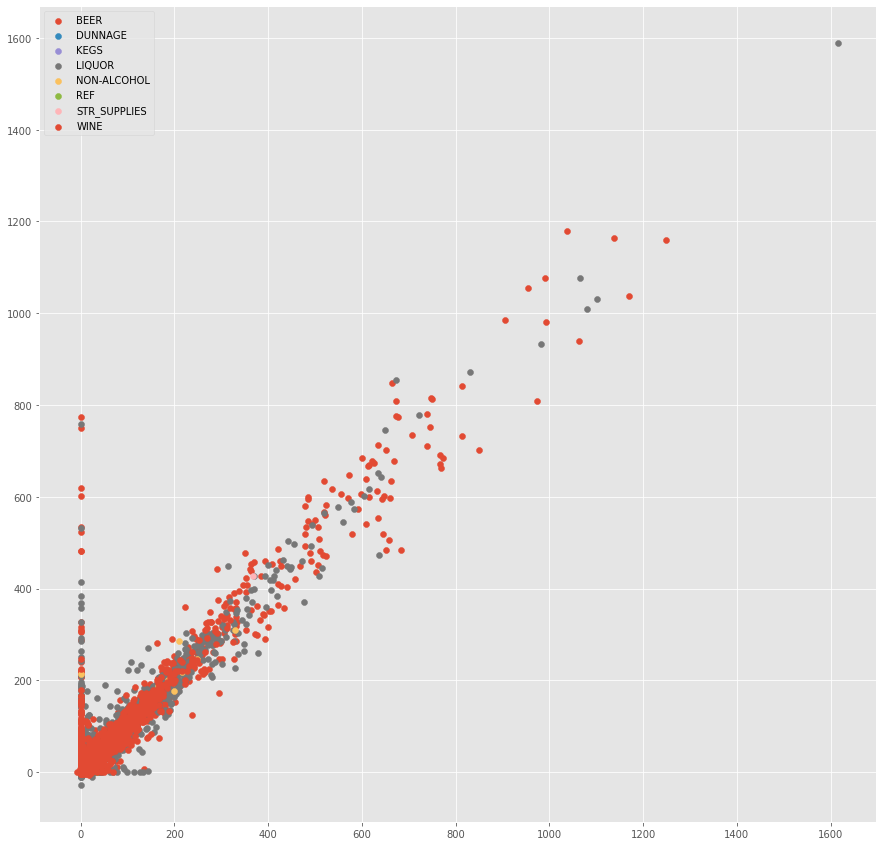

"array(['BEER', 'DUNNAGE', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF',\n       'STR_SUPPLIES', 'WINE'], dtype=object)"

In [69]:
plt.figure(figsize=(15, 15))
plt.scatter(data[data["ItemType"]=='BEER']["RetailSales"],data[data["ItemType"]=='BEER']["RetailTransfers"], label="BEER")
plt.scatter(data[data["ItemType"]=='DUNNAGE']["RetailSales"],data[data["ItemType"]=='DUNNAGE']["RetailTransfers"], label="DUNNAGE")
plt.scatter(data[data["ItemType"]=='KEGS']["RetailSales"],data[data["ItemType"]=='KEGS']["RetailTransfers"], label="KEGS")
plt.scatter(data[data["ItemType"]=='LIQUOR']["RetailSales"],data[data["ItemType"]=='LIQUOR']["RetailTransfers"], label="LIQUOR")
plt.scatter(data[data["ItemType"]=='NON-ALCOHOL']["RetailSales"],data[data["ItemType"]=='NON-ALCOHOL']["RetailTransfers"], label="NON-ALCOHOL")
plt.scatter(data[data["ItemType"]=='REF']["RetailSales"],data[data["ItemType"]=='REF']["RetailTransfers"], label="REF")
plt.scatter(data[data["ItemType"]=='STR_SUPPLIES']["RetailSales"],data[data["ItemType"]=='STR_SUPPLIES']["RetailTransfers"], label="STR_SUPPLIES")
plt.scatter(data[data["ItemType"]=='WINE']["RetailSales"],data[data["ItemType"]=='WINE']["RetailTransfers"], label="WINE")
plt.legend()
plt.show()

"""array(['BEER', 'DUNNAGE', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF',
       'STR_SUPPLIES', 'WINE'], dtype=object)"""

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

array([[<AxesSubplot:xlabel='RetailSales', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailSales'>],
       [<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailTransfers'>],
       [<AxesSubplot:xlabel='RetailSales', ylabel='WarehouseSales'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='WarehouseSales'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='WarehouseSales'>]],
      dtype=object)

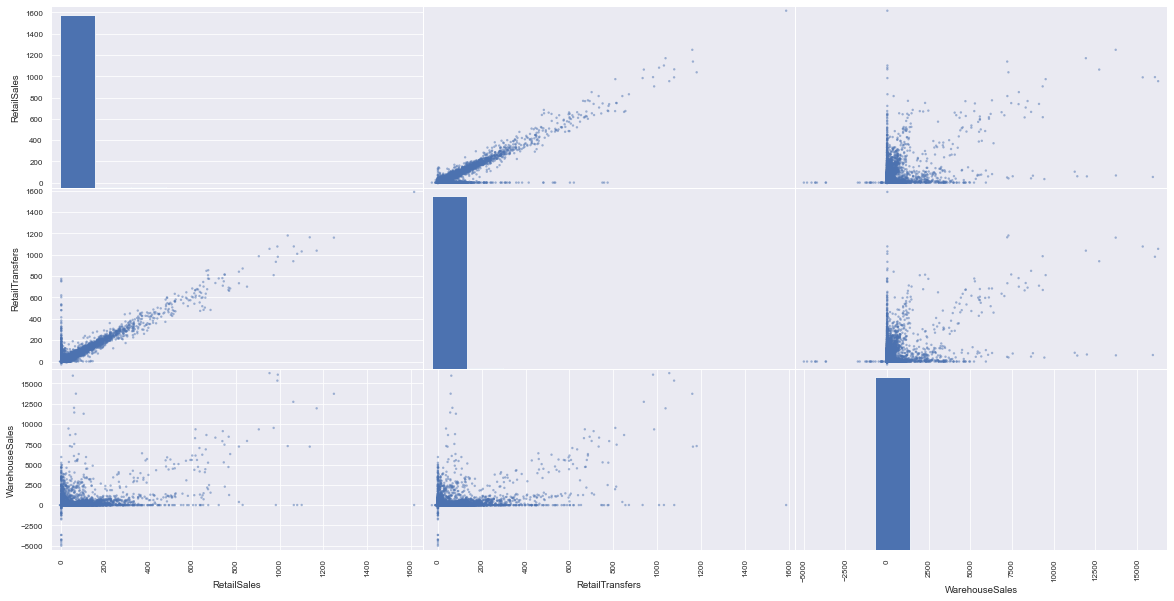

In [72]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (20, 10)})

pd.plotting.scatter_matrix(data.iloc[:,6:9])